<a href="https://colab.research.google.com/github/alibrj82/German-Traffic-Sign-Recognition-Benchmark/blob/main/German_Traffic_Sign_Recognition_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP , RBF ve RBF  K-Means ile German Traffic Sign Recognition Benchmark Modellerinin Karşılaştırmalı Analizi

In [ ]:
# Data processing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# MLP and evaluation
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense, Input, Activation

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import kagglehub
import os
import zipfile

# En son sürümü indirin
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

# Veri kümesi sıkıştırılmışsa, çıkarın
dataset_path = '/root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1'  # Yol `kagglehub.dataset_download'dan alındı`

if dataset_path.endswith('.zip'):
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall("gtsrb_dataset")
        dataset_path = "gtsrb_dataset"

# Dosyaları ve dizinleri listele
for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}, Files: {len(files)}")


100%|██████████| 612M/612M [00:08<00:00, 71.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1
Directory: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1, Files: 3
Directory: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/Train, Files: 0
Directory: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/Train/7, Files: 1440
Directory: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/Train/39, Files: 300
Directory: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/Train/36, Files: 390
Directory: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/Train/16, Files: 420
Directory: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/Train/42, Files: 240
Directory: /root/.cache/kagglehub/datasets/meowme

In [ ]:
# Örnek CSV dosyası yolu
csv_path = os.path.join(dataset_path, "Train.csv")  # CSV dosya adını değiştirin
df = pd.read_csv(csv_path)
# Eksik değerleri analiz et
print(df.info())
print("Eksik değerlerin toplamı:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB
None
Eksik değerlerin toplamı:
Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64


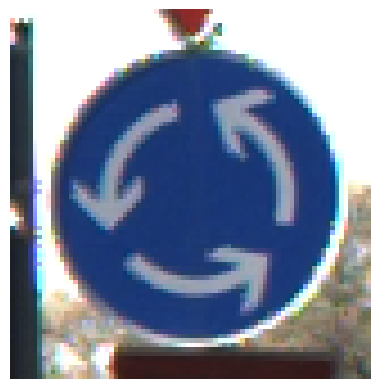

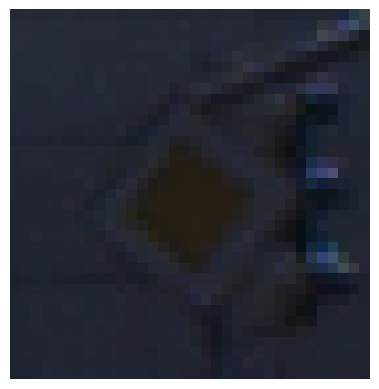

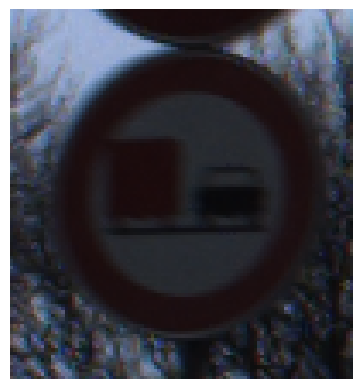

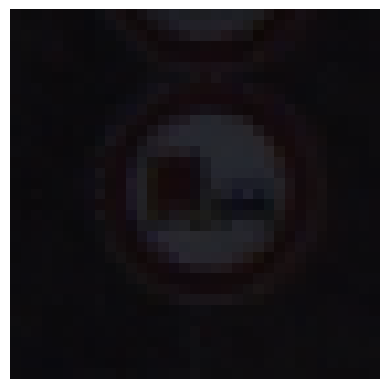

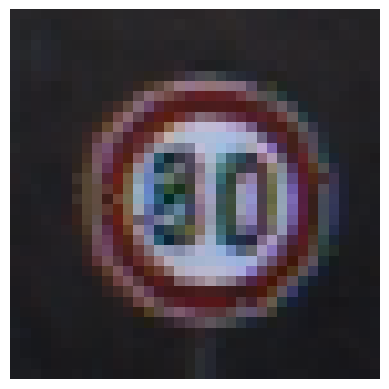

In [ ]:
from PIL import Image
import random

# Rastgele bazı görselleri göstermek
image_files = []
for root, _, files in os.walk(dataset_path):
    image_files.extend([os.path.join(root, file) for file in files if file.endswith('.png')])

sample_images = random.sample(image_files, 5)

for img_path in sample_images:
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [ ]:
# Veri kümesi yollarını ayarlamak
data_dir = "/root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1"
labels_csv = os.path.join(data_dir, "Train.csv")

# Etiketleri yüklemek
df = pd.read_csv(labels_csv)
print(f"'veri kümesinin boyutu:'{df.size}")
print(f"'veri kümesinin şekli:'{df.shape}")
df.head(10)

'veri kümesinin boyutu:'313672
'veri kümesinin şekli:'(39209, 8)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
5,31,27,6,5,26,22,20,Train/20/00020_00000_00005.png
6,31,28,6,6,26,23,20,Train/20/00020_00000_00006.png
7,31,28,6,6,26,23,20,Train/20/00020_00000_00007.png
8,31,29,5,6,26,24,20,Train/20/00020_00000_00008.png
9,34,32,6,6,29,26,20,Train/20/00020_00000_00009.png


In [ ]:
def load_images_and_labels(df, base_path, img_size=(32, 32)):
    images = []
    labels = []
    for _, row in df.iterrows():
        img_path = os.path.join(base_path, row['Path'])
        label = row['ClassId']
        img = Image.open(img_path).convert("RGB").resize(img_size)
        img = np.array(img) / 255.0  # Normalize to [0, 1]
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load images and labels
X, y = load_images_and_labels(df, data_dir)
print(f"Görüntü şekli: {X.shape}, Etiket şekli: {y.shape}")

Görüntü şekli: (39209, 32, 32, 3), Etiket şekli: (39209,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Veri Seti Yükleme ve Ön İşleme
1. Veri İşleme: Bu projede kullanılan veri seti, Almanca Trafik Levhası Tanıma Benchmark’ı (GTSRB) olup, etiketlenmiş trafik levhası görsellerinden oluşmaktadır. Makine öğrenimi modelinin eğitilmesinden önce veri seti işlenmiştir. Aşağıdaki adımlar yer almıştır:


*   Kütüphanelerin İçe Aktarılması: Veri işleme (pandas, numpy), makine öğrenimi (sklearn), derin öğrenme (keras), ve görselleştirme (seaborn, matplotlib) için gerekli kütüphaneler içe aktarılmıştır.
*   Veri Setinin İndirilmesi: kagglehub kütüphanesi kullanılarak veri seti indirilmiş ve eğer .zip formatında sıkıştırılmışsa, içerikleri çıkartılmıştır. Veri setinin yolu doğrulanmıştır.


*   CSV Dosyasının Okunması: Görsellerin dosya yolları ve sınıf etiketlerini içeren CSV dosyası, pandas ile yüklenmiştir.

*   Eksik Verilerin İşlenmesi: Veri setindeki eksik veriler kontrol edilmiş ve herhangi bir eksik değer analiz edilmiştir.
2. Görsel Görselleştirme: Veri seti dizininden görseller alınmış ve rastgele seçilen 5 görsel PIL (Python Imaging Library) kullanılarak görselleştirilmiştir.

3. Görsellerin Yüklenmesi ve Normalizasyonu: load_images_and_labels adında özel bir fonksiyon, görselleri yükleyip işlemiştir:


*   Her görsel, 32x32 piksel boyutuna yeniden boyutlandırılmıştır.
*  Görseller RGB formatına dönüştürülüp [0, 1] aralığına normalize edilmiştir.


*   Trafik levhalarına ait etiketler de çıkartılmıştır.
*   İşlenen görsellerin şekli ve etiketlerin şekli doğrulanmıştır.
4. Veri Setinin Bölünmesi: Veri seti eğitim ve test setlerine ayrılmıştır:


*   Eğitim Verisi: Verilerin %80’i eğitim için kullanılmıştır.
*   Test Verisi: Verilerin %20’si test için ayrılmıştır. Veri, makine öğrenimi modelleriyle kullanılmak üzere düzleştirilmiştir.
5. Özellik Ölçekleme: Görseller, MinMaxScaler kullanılarak [0, 1] aralığına normalize edilmiştir. Bu işlem, modelin eğitiminde performansı iyileştirmektedir.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

# GridSearchCV için bir puanlama sözlüğü tanımlamak
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'recall': make_scorer(recall_score, average='weighted', zero_division=1),
    'f1_score': make_scorer(f1_score, average='weighted', zero_division=1)
}

# GridSearchCV ile hiperparametre ayarlama
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100, 50)],
    'activation': ['relu', 'tanh','logistic'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01],
}

# birden fazla metriğe sahip GridSearchCV
grid_search_mlp = GridSearchCV(
    estimator=MLPClassifier(max_iter=1000 , random_state=42),
    param_grid=param_grid,
    scoring=scoring,
    refit='accuracy',  # En iyi modeli yeniden yerleştirmek için doğruluğu seçmek
    cv=3,
    return_train_score=True
)

grid_search_mlp.fit(X_train_scaled, y_train)

# Sonuçları bir DataFrame'e çıkarmak
cv_results = pd.DataFrame(grid_search_mlp.cv_results_)

# İlgili sütunları filtreleyip ve görüntülemek
result_summary = cv_results[[
    'param_hidden_layer_sizes',
    'param_activation',
    'param_solver',
    'param_learning_rate_init',
    'mean_test_accuracy',
    'mean_test_precision',
    'mean_test_recall',
    'mean_test_f1_score'
]].sort_values(by='mean_test_accuracy', ascending=False)

# Sonuçları göstermek
print("Tüm Parametre Kombinasyonları ve Puanları:")
print(result_summary)




Tüm Parametre Kombinasyonları ve Puanları:
   param_hidden_layer_sizes param_activation param_solver  \
18                   (100,)         logistic         adam   
10                   (100,)             tanh         adam   
16                    (50,)         logistic         adam   
20                (100, 50)         logistic         adam   
14           (100, 100, 50)             tanh         adam   
4                 (100, 50)             relu         adam   
12                (100, 50)             tanh         adam   
8                     (50,)             tanh         adam   
2                    (100,)             relu         adam   
6            (100, 100, 50)             relu         adam   
0                     (50,)             relu         adam   
22           (100, 100, 50)         logistic         adam   
19                   (100,)         logistic         adam   
17                    (50,)         logistic         adam   
21                (100, 50)         logist

In [ ]:
print("Best MLP Parameters:", grid_search_mlp.best_params_)
print("Best MLP Training Score:", grid_search_mlp.best_score_)

Best MLP Parameters: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'solver': 'adam'}
Best MLP Training Score: 0.9702552601834583


# MLP Modeli için GridSearchCV Hiperparametre Optimizasyonu
1. Hiperparametre Optimizasyonu: Bu bölümde, MLP modelinin performansını iyileştirmek amacıyla GridSearchCV kullanılarak hiperparametre optimizasyonu yapılmıştır. GridSearchCV, farklı parametre kombinasyonlarını deneyerek en iyi modelin hiperparametrelerini bulmak için kullanılır.

Puanlama Metrikleri:


*  accuracy: Doğruluk
*   precision: Ağırlıklı doğruluk


*   recall: Ağırlıklı hatırlama
*   f1_score: Ağırlıklı F1 skoru Bu metrikler, modelin çeşitli yönlerini değerlendirebilmek için kullanıldı.

Hiperparametre Ağı:
*   hidden_layer_sizes: Sinir ağı için farklı katman büyüklükleri denendi: (50,), (100,), (100, 50), (100, 100, 50).
*   activation: Aktivasyon fonksiyonları olarak 'relu', 'tanh' ve 'logistic' kullanıldı.
*   solver: 'adam' çözümleyicisi kullanıldı.
*   learning_rate_init: Başlangıç öğrenme oranı olarak 0.001 ve 0.01 denendi.
2. GridSearchCV Sonuçları: GridSearchCV, belirtilen parametre ağını kullanarak 3 katmanlı çapraz doğrulama (cross-validation) işlemi gerçekleştirdi ve her parametre kombinasyonu için doğruluk, hassasiyet, hatırlama ve F1 skoru gibi metrikleri hesapladı.

Özet Sonuçlar: GridSearchCV'nin en iyi hiperparametre kombinasyonları şunlardır:


*   En iyi Parametreler:

  *   activation: 'logistic'
  *   hidden_layer_sizes: (100,)
  *   learning_rate_init: 0.001
  *   solver: 'adam'
*   En İyi Eğitim Skoru: 0.970 (yaklaşık %97 doğruluk)

3. Sonuçların Görselleştirilmesi: Sonuçlar, parametre kombinasyonları ve ilgili performans metrikleri ile sıralanmış bir DataFrame olarak görüntülendi. En iyi sonuçları veren parametre kombinasyonu, doğruluk skoruna göre sıralandı.

In [ ]:
# Test setini tahmin etmek
y_test_pred = grid_search_mlp.best_estimator_.predict(X_test_scaled)

# Çeşitli ölçümler kullanarak değerlendirme yapmak
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred, zero_division=1))

# Confusion Matrix
print("Confusion Matrix on Test Data:")
print(confusion_matrix(y_test, y_test_pred))

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.98      0.92      0.95       474
           2       0.90      0.97      0.93       452
           3       0.96      0.87      0.91       295
           4       0.97      0.98      0.97       420
           5       0.86      0.96      0.91       332
           6       0.99      1.00      0.99        82
           7       0.94      0.95      0.95       276
           8       0.97      0.97      0.97       283
           9       1.00      0.96      0.98       304
          10       1.00      0.99      0.99       349
          11       0.96      0.98      0.97       242
          12       1.00      0.99      1.00       454
          13       0.99      0.98      0.98       441
          14       1.00      0.98      0.99       167
          15       0.99      0.93      0.96       127
          16       1.00      0.98      0.99  

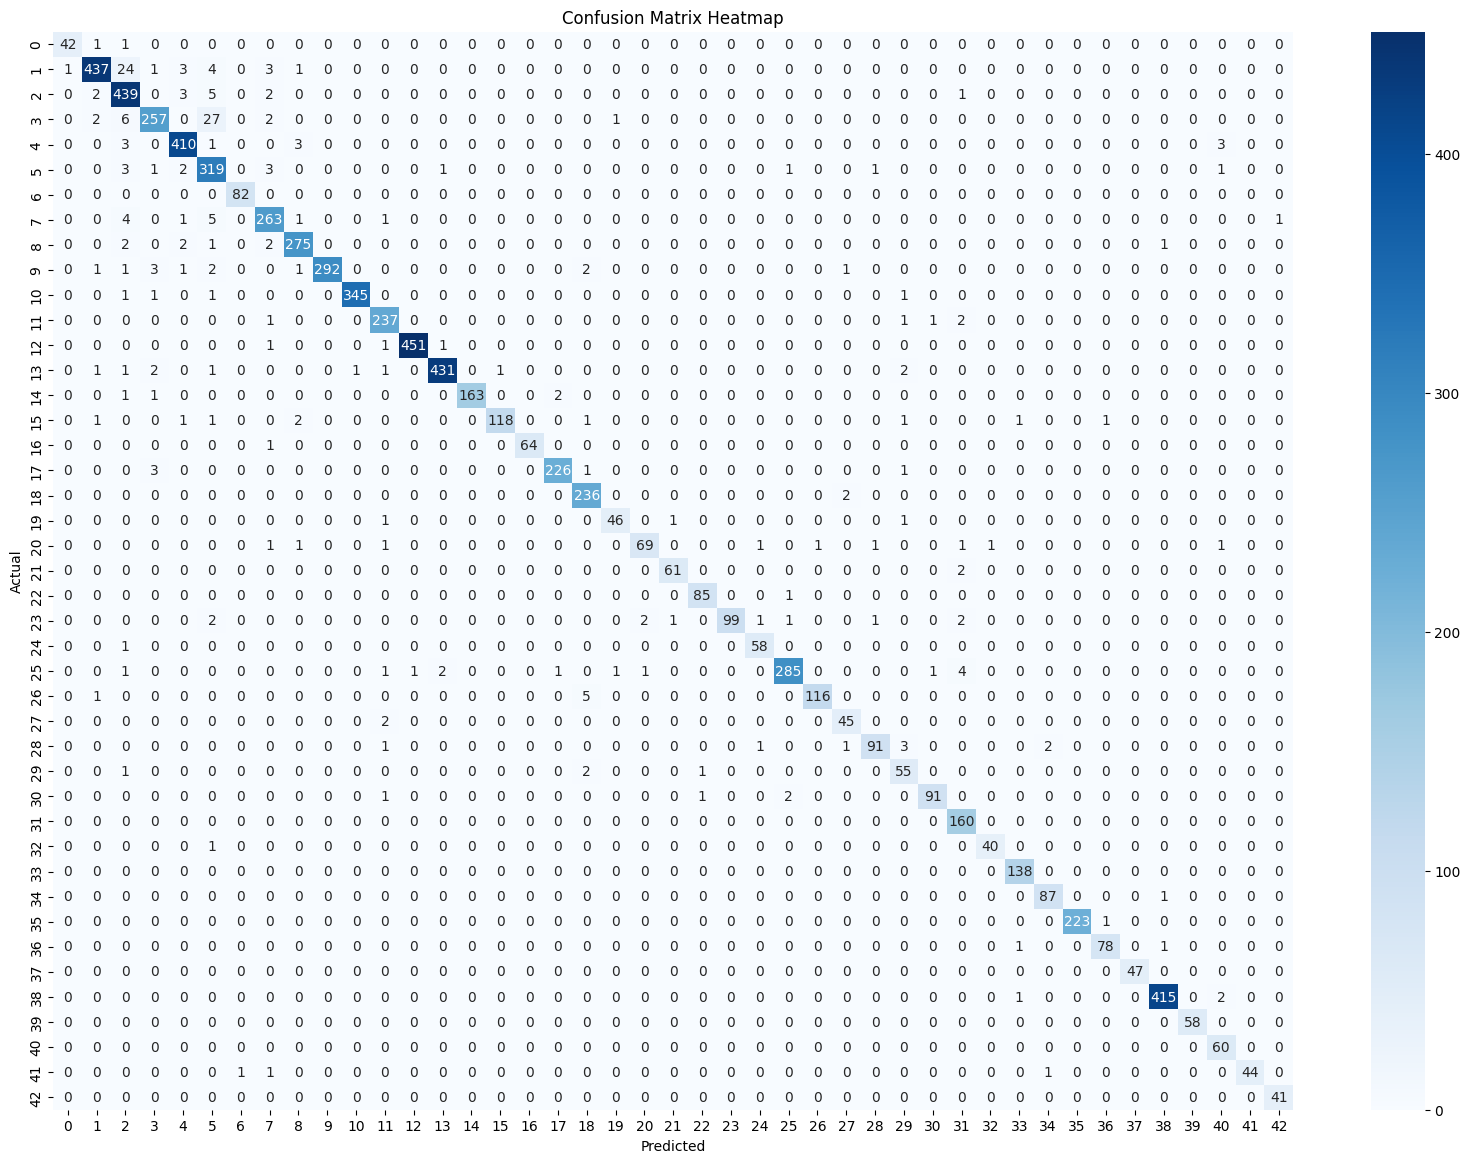

In [ ]:
# Confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(20, 14))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Eğitim performansı
train_accuracy = grid_search_mlp.best_score_
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Best Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Best Training Accuracy: 0.9703
Test Accuracy: 0.9665


# MLP Modelinin Test Verisi Üzerindeki Performans Değerlendirme Sonuçu


*   Model, çoğu sınıfta düşük hata oranıyla doğru tahminlerde bulunmuştur.
*   Modelin test verisindeki doğruluk oranı oldukça yüksek (%97).


*   Makro ve ağırlıklı ortalama F1 skorları, modelin genel olarak dengeli bir performans gösterdiğini işaret etmektedir.
*   Sınıf bazında performans farklılıkları analiz edilerek zayıf alanlar geliştirilebilir.


*   Karmaşıklık matrisi incelenerek, en çok hata yapılan sınıflar için özel iyileştirmeler yapılabilir (örneğin, daha fazla veri ile yeniden eğitim)
*   Performansın artırılması için:
Düşük performans gösteren sınıflar için veri artırımı (data augmentation) yapılabilir.







Training with num_units=50, gamma=0.1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Training with num_units=50, gamma=1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Training with num_units=50, gamma=10.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training with num_units=100, gamma=0.1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training with num_units=100, gamma=1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Training with num_units=100, gamma=10.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
All Parameter Combinations and Scores:
   num_units  gamma  accuracy  precision    recall  f1_score
0         50    0.1  0.191698   0.582275  0.191698  0.193385
1         50    1.0  0.100010   0.632435  0.100010  0.075584
2         50   10.0  0.057321   0.945964  0.057321  0.006215
3        100    0.1  0.230656   0.629011  0.230656  0.250757
4        100    1.0  0.111040   0.626589  0.111040  0.094969
5        100   10.0  0.057321   0.945964  0.057321  0.006215

Best Parameters for RBF:
num_units    100.000000
gamma          0.100000
accuracy       0.230656
precision      0.629011
recall         0.230656
f1_score       0.250757
Name: 3, dtype: float64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0781 - loss: 3.6146
Epoch 2/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1097 - loss: 3.3858
Epoch 3/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1254 - loss: 3.3054
Epoch 4/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1360 - loss: 3.2603
Epoch 5/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1425 - loss: 3.2230
Epoch 6/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1539 - loss: 3.1845
Epoch 7/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1651 - loss: 3.1446
Epoch 8/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1639 - loss: 3.1440
Epoch 9/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1665 - loss: 3.1225
Epoch 10/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1707 - loss: 3.1021
Epoch 11/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1736 - loss: 3.0871
Epoch 12/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

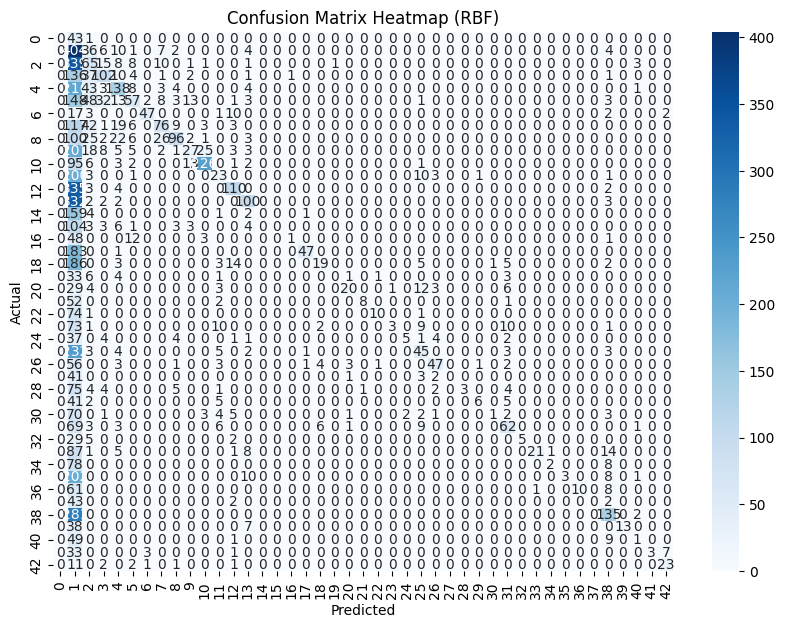

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import tensorflow as tf

# RBF Katmanını Tanımlamak
class RBFLayer(Dense):
    def __init__(self, num_units, gamma=1.0, **kwargs):
        self.num_units = num_units
        self.gamma = gamma
        super().__init__(num_units, **kwargs)

    def build(self, input_shape):
        self.centers = self.add_weight(
            name='centers',
            shape=(self.num_units, input_shape[-1]),
            initializer='random_normal',
            trainable=True
        )
        self.built = True

    def call(self, inputs):
        c = self.centers
        d = tf.reduce_sum((tf.expand_dims(inputs, 1) - c) ** 2, axis=2)
        return tf.exp(-self.gamma * d)

# RBF modelini oluşturmak için bir işlev tanımlamak
def create_rbf_model(input_dim, num_units, gamma, num_classes):
    model = Sequential([
        RBFLayer(num_units=num_units, gamma=gamma, input_shape=(input_dim,)),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Hyperparameter grid
param_grid_rbf = {
    'num_units': [50, 100],
    'gamma': [0.1, 1.0, 10.0]
}

# Cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
results = []

for num_units in param_grid_rbf['num_units']:
    for gamma in param_grid_rbf['gamma']:
        fold_results = []
        print(f"Training with num_units={num_units}, gamma={gamma}")
        for train_idx, val_idx in cv.split(X_train_scaled, y_train):
            X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
            y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

            # Modeli oluşturup ve eğitmek
            model = create_rbf_model(
                input_dim=X_train_scaled.shape[1],
                num_units=num_units,
                gamma=gamma,
                num_classes=len(np.unique(y_train))
            )
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
            model.fit(X_train_fold, y_train_fold,
                      validation_data=(X_val_fold, y_val_fold),
                      epochs=50,
                      batch_size=32,
                      verbose=0,
                      callbacks=[early_stopping])

            # Doğrulama verilerini değerlendirmek
            y_val_pred = np.argmax(model.predict(X_val_fold), axis=1)
            acc = accuracy_score(y_val_fold, y_val_pred)
            prec = precision_score(y_val_fold, y_val_pred, average='weighted', zero_division=1)
            rec = recall_score(y_val_fold, y_val_pred, average='weighted', zero_division=1)
            f1 = f1_score(y_val_fold, y_val_pred, average='weighted', zero_division=1)
            fold_results.append((acc, prec, rec, f1))

        # Bu parametre kombinasyonu için sonuçların ortalamasını almak
        mean_results = np.mean(fold_results, axis=0)
        results.append({'num_units': num_units, 'gamma': gamma, 'accuracy': mean_results[0],
                        'precision': mean_results[1], 'recall': mean_results[2], 'f1_score': mean_results[3]})

# Sonuçları DataFrame'e dönüştürmek
results_df = pd.DataFrame(results)
best_params = results_df.loc[results_df['accuracy'].idxmax()]

print("All Parameter Combinations and Scores:")
print(results_df)

print("\nBest Parameters for RBF:")
print(best_params)

# Tam eğitim setinde en iyi parametrelerle eğitim almak
best_model = create_rbf_model(
    input_dim=X_train_scaled.shape[1],
    num_units=int(best_params['num_units']),
    gamma=float(best_params['gamma']),
    num_classes=len(np.unique(y_train))
)
best_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Test setinde değerlendirmek
y_test_pred_rbf = np.argmax(best_model.predict(X_test_scaled), axis=1)

print("Classification Report on Test Data (RBF):")
print(classification_report(y_test, y_test_pred_rbf, zero_division=1))

# Confusion Matrix
conf_matrix_rbf = confusion_matrix(y_test, y_test_pred_rbf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rbf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap (RBF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#  RBF Model Performans Analizi
1. Hiperparametre Optimizasyonu

*   Hiperparametreler:
 *   Gamma: 0.1, 1.0, 10.0

  *   Nöron Sayısı (Num Units): 50, 100
*  En İyi Parametreler:

  *   Gamma: 0.1
  *   Nöron Sayısı: 100


*   En İyi Doğrulama Sonuçları:
 *   Accuracy: 0.23 ,Precision (Weighted Avg): 0.63,Recall (Weighted Avg): 0.23,
F1-Score (Weighted Avg): 0.25


*   Bazı sınıflar için yüksek precision değerleri elde edilirken, çoğu sınıfta recall oranı oldukça düşük kalmıştır.Örnek:
Sınıf 1: Recall = %85, Precision = %8 (dengesiz bir performans),
Sınıf 38: F1-Score = %43, Precision ve Recall dengeli , Sınıf 14, 15, 27, 37: Precision yüksek (%100), ancak recall = 0


*   RBF modeli, doğruluk ve diğer metriklerde sınırlı bir başarı göstermiştir:
*   Gamma ve nöron sayısı gibi hiperparametrelerin optimize edilmesine rağmen düşük doğruluk elde edilmiştir.

- Modelin bazı sınıflara aşırı uyum sağladığı, ancak diğer sınıflarda başarısız olduğu görülmüştür.
- Performansın düşük olmasının olası nedenleri:
  - Sınıf sayısının fazla olması ve veri dengesizliği.
  - RBF modelinin, karmaşık veri setlerinde yeterince esnek olamaması.







Training with num_units=50


<ipython-input-8-affec00be112>:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(RBFLayer, self).__init__(**kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<ipython-input-8-affec00be112>:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(RBFLayer, self).__init__(**kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<ipython-input-8-affec00be112>:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(RBFLayer, self).__init__(**kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training with num_units=100


<ipython-input-8-affec00be112>:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(RBFLayer, self).__init__(**kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


<ipython-input-8-affec00be112>:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(RBFLayer, self).__init__(**kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<ipython-input-8-affec00be112>:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(RBFLayer, self).__init__(**kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training with num_units=1000


<ipython-input-8-affec00be112>:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(RBFLayer, self).__init__(**kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<ipython-input-8-affec00be112>:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(RBFLayer, self).__init__(**kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<ipython-input-8-affec00be112>:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(RBFLayer, self).__init__(**kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
All Parameter Combinations and Scores:
   num_units     gamma  accuracy  precision    recall  f1_score
0         50  0.001587  0.369816   0.551438  0.369816  0.306392
1        100  0.001424  0.415245   0.586682  0.415245  0.350720
2       1000  0.001074  0.694966   0.749738  0.694966  0.675872

Best Parameters for RBF with K-Means:
num_units    1000.000000
gamma           0.001074
accuracy        0.694966
precision       0.749738
recall          0.694966
f1_score        0.675872
Name: 2, dtype: float64


<ipython-input-8-affec00be112>:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(RBFLayer, self).__init__(**kwargs)


Epoch 1/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.0742 - loss: 3.6097
Epoch 2/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1571 - loss: 3.2662
Epoch 3/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2362 - loss: 2.9695
Epoch 4/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2946 - loss: 2.7286
Epoch 5/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3357 - loss: 2.5243
Epoch 6/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3652 - loss: 2.3746
Epoch 7/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3943 - loss: 2.2527
Epoch 8/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4186 - loss: 2.1578
Epoch 9/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4362 - loss: 2.0647
Epoch 10/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4561 - loss: 2.0052
Epoch 11/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4737 - loss: 1.9176
Epoch 12/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/s

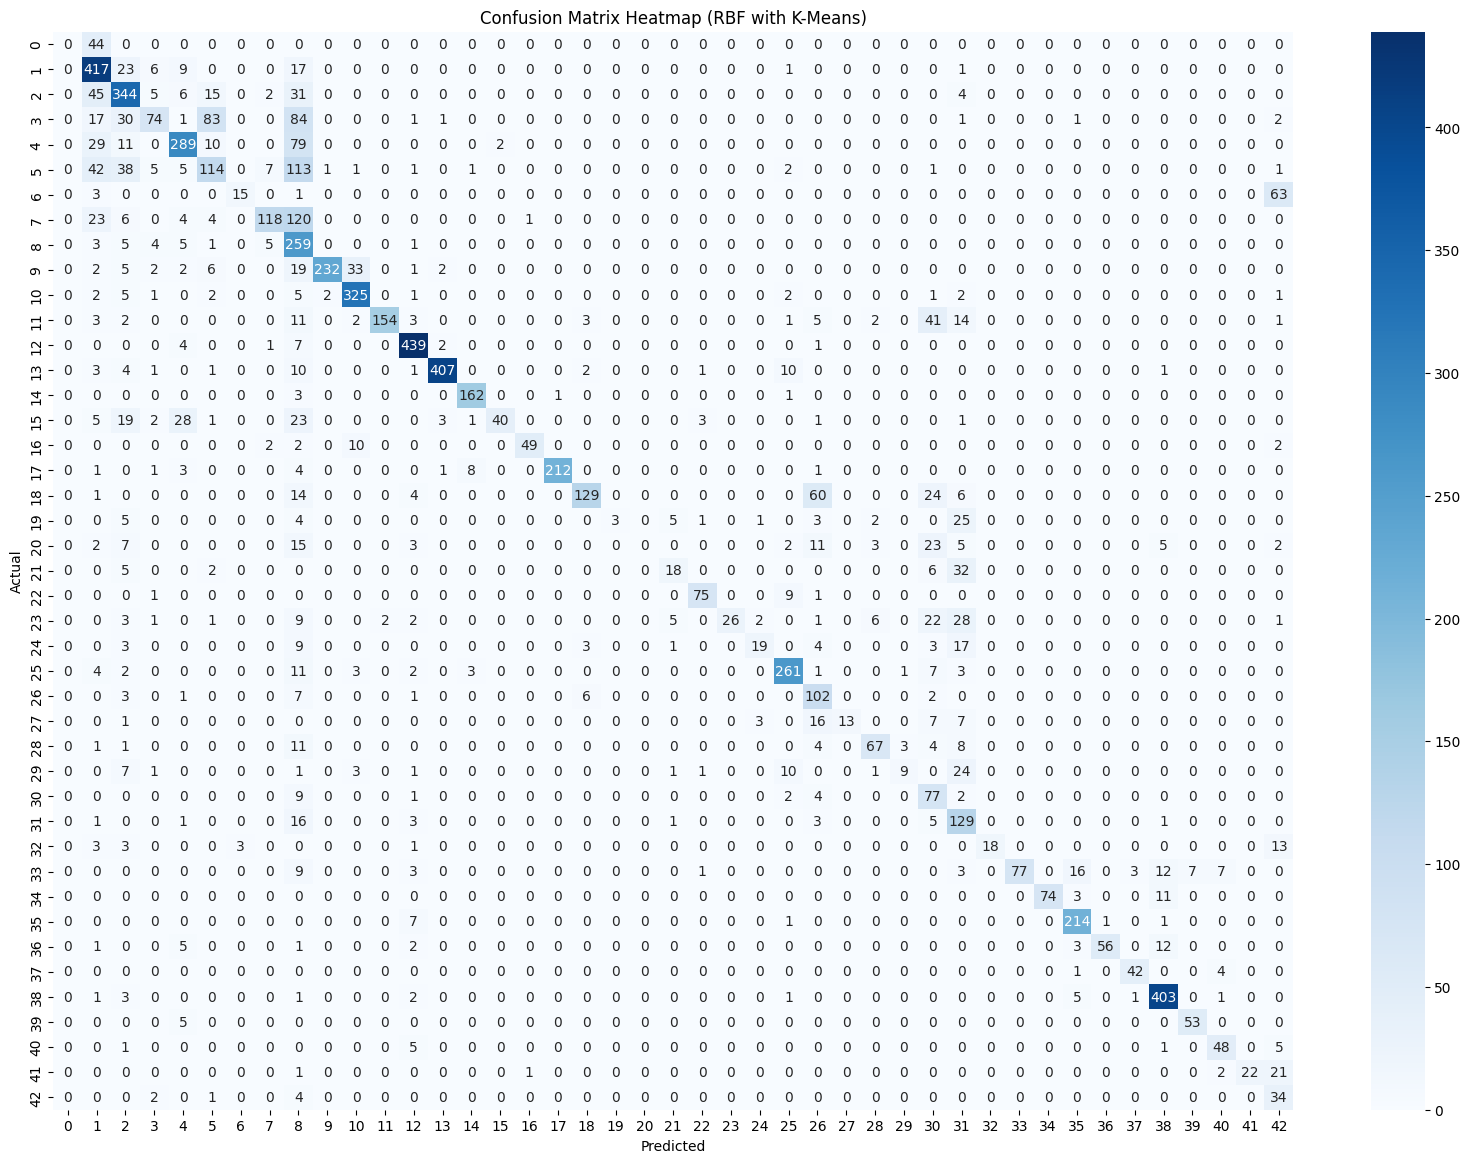

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Layer

# RBF Katmanını Tanımlamak
class RBFLayer(Layer):
    def __init__(self, num_units, gamma=1.0, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.num_units = num_units
        self.gamma = gamma

    def build(self, input_shape):
        self.centers = self.add_weight(
            name='centers',
            shape=(self.num_units, input_shape[-1]),
            initializer='random_normal',
            trainable=True
        )
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        c = self.centers
        d = tf.reduce_sum((tf.expand_dims(inputs, 1) - c) ** 2, axis=2)
        return tf.exp(-self.gamma * d)

# K-Means ile  gama'yı hesaplamak
def initialize_with_kmeans(X_train_scaled, num_units):
    kmeans = KMeans(n_clusters=num_units, random_state=42)
    kmeans.fit(X_train_scaled)
    centers = kmeans.cluster_centers_
    dists = pairwise_distances(centers)
    gamma = 1.0 / (2 * np.mean(dists) ** 2)
    return centers, gamma

# K-Means'i kullanarak RBF modeli oluşturmak
def create_rbf_model_with_kmeans(centers, gamma, input_dim, num_classes):
    model = Sequential([
        RBFLayer(num_units=centers.shape[0], gamma=gamma, input_shape=(input_dim,)),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Hyperparameter grid
param_grid_rbf_kmeans = {
    'num_units': [50, 100,1000],
}

# Cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
results = []

for num_units in param_grid_rbf_kmeans['num_units']:
    print(f"Training with num_units={num_units}")
    fold_results = []
    for train_idx, val_idx in cv.split(X_train_scaled, y_train):
        X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

        # K-Ortalamalar ile merkezleri ve gamayı hesaplamak
        centers, gamma = initialize_with_kmeans(X_train_fold, num_units)

        # Modeli oluşturma ve eğitmek
        model = create_rbf_model_with_kmeans(
            centers, gamma, input_dim=X_train_scaled.shape[1], num_classes=len(np.unique(y_train))
        )
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model.fit(X_train_fold, y_train_fold,
                  validation_data=(X_val_fold, y_val_fold),
                  epochs=50, batch_size=32, verbose=0, callbacks=[early_stopping])

        # Doğrulama setinde değerlendirmek
        y_val_pred = np.argmax(model.predict(X_val_fold), axis=1)
        acc = accuracy_score(y_val_fold, y_val_pred)
        prec = precision_score(y_val_fold, y_val_pred, average='weighted', zero_division=1)
        rec = recall_score(y_val_fold, y_val_pred, average='weighted', zero_division=1)
        f1 = f1_score(y_val_fold, y_val_pred, average='weighted', zero_division=1)
        fold_results.append((acc, prec, rec, f1))

    # Bu parametre kümesi için ortalama sonuçlar
    mean_results = np.mean(fold_results, axis=0)
    results.append({'num_units': num_units, 'gamma': gamma, 'accuracy': mean_results[0],
                    'precision': mean_results[1], 'recall': mean_results[2], 'f1_score': mean_results[3]})

# Sonuçları DataFrame'e dönüştürmek
results_df = pd.DataFrame(results)
best_params = results_df.loc[results_df['accuracy'].idxmax()]

print("All Parameter Combinations and Scores:")
print(results_df)

print("\nBest Parameters for RBF with K-Means:")
print(best_params)

# Son modeli en iyi parametrelerle eğitmek
best_num_units = int(best_params['num_units'])
centers, gamma = initialize_with_kmeans(X_train_scaled, best_num_units)
best_model = create_rbf_model_with_kmeans(
    centers, gamma, input_dim=X_train_scaled.shape[1], num_classes=len(np.unique(y_train))
)
best_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Test evaluation
y_test_pred_rbf = np.argmax(best_model.predict(X_test_scaled), axis=1)

print("Classification Report on Test Data (RBF with K-Means):")
print(classification_report(y_test, y_test_pred_rbf, zero_division=1))

# Confusion Matrix
conf_matrix_rbf = confusion_matrix(y_test, y_test_pred_rbf)
plt.figure(figsize=(20, 14))
sns.heatmap(conf_matrix_rbf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap (RBF with K-Means)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# RBF ve K-Means Kullanılarak Sınıflandırma:
RBF (Radial Basis Function) ağı, yapay sinir ağlarının bir türü olup, özellikle sınıflandırma ve regresyon problemlerinde kullanılır. Bu ağlar, aktivasyon fonksiyonları olarak genellikle Gaussian veya benzeri radyal taban fonksiyonlarını kullanır. Giriş verilerinin merkezlere olan uzaklıklarına göre aktivasyon değerleri hesaplanır ve bu merkezler genellikle K-Means algoritmasıyla belirlenir. K-Means, veriyi önceden belirlenmiş bir küme sayısına ayırmak için kullanılan bir kümeleme algoritmasıdır. RBF ağlarında, K-Means, veri dağılımını anlamak ve RBF katmanının merkezlerini tanımlamak için kullanılır. Ayrıca, K-Means ile hesaplanan merkezler arası uzaklıklar, gamma parametresinin (RBF'nin duyarlılığı) optimize edilmesine olanak tanır, böylece ağın doğruluğu ve genelleştirme kabiliyeti artırılır. Bu entegrasyon, özellikle karmaşık sınıflandırma problemlerinde etkili bir çözüm sağlar.


*   RBF Katmanı:Model, RBF katmanı için özel bir sınıf (RBFLayer) ile oluşturuldu.
Bu katman, girişlerin RBF merkezlerine olan uzaklıklarına göre aktivasyon değerleri hesapladı.
*   K-Means Entegrasyonu:RBF katmanının merkezlerini belirlemek için K-Means algoritması kullanıldı.
Gamma değeri, K-Means ile hesaplanan merkezler arası uzaklıklar üzerinden optimize edildi.




*   Model Eğitimi:Farklı num_units (RBF nöron sayısı) hiperparametreleri ile eğitim yapıldı.
Erken durdurma (EarlyStopping) ile aşırı öğrenme önlendi.
Eğitim, çapraz doğrulama (StratifiedKFold) yöntemiyle yapılarak model genelleştirilebilirliği artırıldı.
*   En iyi sonuç, 1000 nöron ve gamma = 0.001074 ile elde edilmiştir.


*   Model, daha fazla RBF nöronuyla doğruluk ve diğer metriklerde önemli bir iyileşme göstermiştir.
*   Model, test setinde %72 doğruluk sağlamıştır.


*   Dengeli sınıflar için yüksek precision ve recall değerleri görülürken, veri dengesizliği bulunan sınıflarda bu değerler düşmüştür.

RBF modeli, K-Means ile entegre edilerek geniş veri kümelerinde başarılı bir sınıflandırma sağlamıştır. Ancak, az örnekli sınıflar için performans iyileştirmeleri yapılabilir.
















Comparison of MLP, RBF, and RBF with K-Means Models:
            MLP  RBF with K-Means   RBF
Accuracy   0.97              0.72  0.25
Precision  0.97              0.82  0.70
Recall     0.97              0.62  0.18
F1-Score   0.97              0.63  0.23


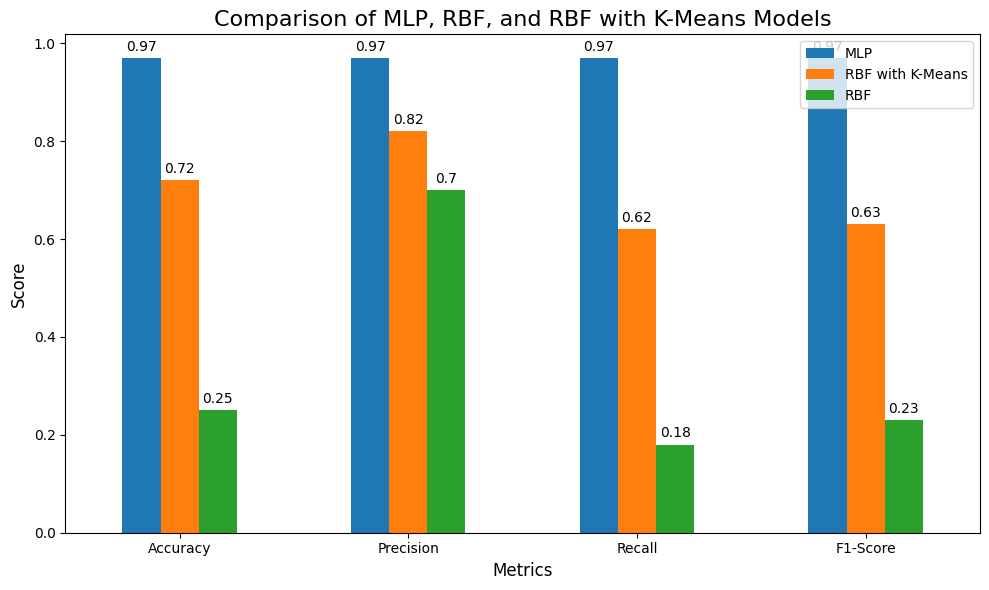

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Metrics data
mlp_metrics = {
    'Accuracy': 0.97,
    'Precision': 0.97,
    'Recall': 0.97,
    'F1-Score': 0.97
}

rbf_metrics = {
    'Accuracy': 0.25,
    'Precision': 0.70,
    'Recall': 0.18,
    'F1-Score': 0.23
}

rbf_kmeans_metrics = {
    'Accuracy': 0.72,
    'Precision': 0.82,
    'Recall': 0.62,
    'F1-Score': 0.63
}

# Create comparison dataframe
comparison = pd.DataFrame({
    'MLP': mlp_metrics,
    'RBF with K-Means': rbf_kmeans_metrics,
    'RBF': rbf_metrics,
})

# Karşılaştırma Tablosu
comparison = pd.DataFrame({
    'MLP': mlp_metrics,
    'RBF with K-Means': rbf_kmeans_metrics,  # RBF with K-Means
    'RBF': rbf_metrics,  # First RBF model
})
print("Comparison of MLP, RBF, and RBF with K-Means Models:")
print(comparison)


# Plotting
ax = comparison.plot(kind='bar', figsize=(10, 6))

# Add title and labels
plt.title('Comparison of MLP, RBF, and RBF with K-Means Models', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Add the exact results above each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=3)

# Show the chart
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# MLP ve RBF ve RBF  K-Means ile Modellerinin Karşılaştırmalı Analizi
Sonuçların analizi, kullanılan modellerin performansındaki önemli farkları ortaya koymaktadır. MLP (Multilayer Perceptron) modeli, %97 gibi yüksek bir doğruluk, hassasiyet, geri çağırma ve F1 puanı ile en iyi performansı göstermiştir. Bu, MLP'nin veriyi etkili bir şekilde öğrenme ve genelleme kapasitesine sahip olduğunu göstermektedir. RBF (Radial Basis Function) ağı, yalnızca %25 doğruluk sağlayarak beklenenden düşük bir performans göstermiştir; bu durum, ağın hiperparametre optimizasyonunda eksiklikler veya modelin karmaşık veri yapılarını öğrenmekte zorlanmasından kaynaklanabilir. Ancak, K-Means ile desteklenen RBF modeli, doğrulukta %72'ye, F1 puanında ise %63'e ulaşarak önemli bir iyileşme göstermiştir. Bu sonuç, K-Means'in RBF modelini daha iyi merkezler ve gamma parametresi ile optimize ederek performansı artırdığını ortaya koymaktadır. Genel olarak, MLP üstün bir performans sergilerken, K-Means destekli RBF, potansiyelini göstermiş ve standart RBF'ye göre belirgin bir avantaj sağlamıştır.